# Credit Card Fraud Detection::

Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Description about dataset::

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 


### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# WORKFLOW :

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables. 

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92%

10.Evaluation Step

11Prediction


# Task::

## Identify fraudulent credit card transactions.

In [1]:
import tensorflow as tf 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [2]:
import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb

1.Load Data

In [3]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Q2Assignments/creditcard.csv')

In [5]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.info

<bound method DataFrame.info of             Time         V1         V2  ...       V28  Amount  Class
0            0.0  -1.359807  -0.072781  ... -0.021053  149.62      0
1            0.0   1.191857   0.266151  ...  0.014724    2.69      0
2            1.0  -1.358354  -1.340163  ... -0.059752  378.66      0
3            1.0  -0.966272  -0.185226  ...  0.061458  123.50      0
4            2.0  -1.158233   0.877737  ...  0.215153   69.99      0
...          ...        ...        ...  ...       ...     ...    ...
284802  172786.0 -11.881118  10.071785  ...  0.823731    0.77      0
284803  172787.0  -0.732789  -0.055080  ... -0.053527   24.79      0
284804  172788.0   1.919565  -0.301254  ... -0.026561   67.88      0
284805  172788.0  -0.240440   0.530483  ...  0.104533   10.00      0
284806  172792.0  -0.533413  -0.189733  ...  0.013649  217.00      0

[284807 rows x 31 columns]>

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


2.Check Missing Values

In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
#There is no missing data in the entire dataset.

In [9]:
normal=df[df["Class"]==0]
fraud=df[df["Class"]==1]

In [11]:
data=df.iloc[:,:-1]
labels=df["Class"]

4.Splitting

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_data, test_data, train_labels, test_labels = train_test_split(data,labels, test_size = 0.3)

In [15]:
train_data.shape

(199364, 30)

In [16]:
test_data.shape

(85443, 30)

In [17]:
train_labels.shape

(199364,)

In [18]:
test_labels.shape

(85443,)

3.Standardized the Input Variables.

In [31]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

5.Model

In [32]:
from tensorflow.keras import models
from tensorflow.keras import layers
model=models.Sequential()
model.add(layers.Dense(20,activation='relu',input_shape=(train_data.shape[1],)))
model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(6,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

6.Compilation

In [33]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

7.Train the Model with Epochs (100)

In [34]:
history=model.fit(train_data,train_labels,epochs=100,validation_split=.2)

Epoch 1/100
4985/4985 [==============================] - 10s 2ms/step - loss: 0.0521 - accuracy: 0.9969 - val_loss: 0.0077 - val_accuracy: 0.9995
Epoch 2/100
4985/4985 [==============================] - 9s 2ms/step - loss: 0.0085 - accuracy: 0.9992 - val_loss: 0.0081 - val_accuracy: 0.9994
Epoch 3/100
4985/4985 [==============================] - 9s 2ms/step - loss: 0.0080 - accuracy: 0.9993 - val_loss: 0.0096 - val_accuracy: 0.9994
Epoch 4/100
4985/4985 [==============================] - 8s 2ms/step - loss: 0.0100 - accuracy: 0.9992 - val_loss: 0.0068 - val_accuracy: 0.9994
Epoch 5/100
4985/4985 [==============================] - 8s 2ms/step - loss: 0.0078 - accuracy: 0.9992 - val_loss: 0.0063 - val_accuracy: 0.9995
Epoch 6/100
4985/4985 [==============================] - 8s 2ms/step - loss: 0.0064 - accuracy: 0.9994 - val_loss: 0.0053 - val_accuracy: 0.9993
Epoch 7/100
4985/4985 [==============================] - 8s 2ms/step - loss: 0.0062 - accuracy: 0.9994 - val_loss: 0.0056 - val_a

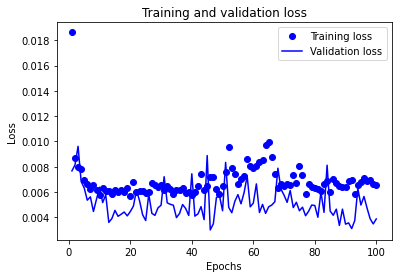

In [36]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = np.arange(1, len(history_dict["accuracy"]) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') #“bo” is for “blue dot.”
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') #“b” is for “solid blue line.”
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


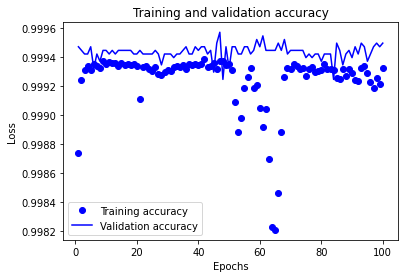

In [40]:
plt.clf() #Clears the figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict["accuracy"], 'bo', label='Training accuracy')
plt.plot(epochs, history_dict["val_accuracy"], 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


9.Prediction

In [44]:
x=model.predict(train_data).astype(dtype="u8")
x

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=uint64)

8.Tuning & 10.Evaluation

In [42]:
model=models.Sequential()
model.add(layers.Dense(20,activation='relu',input_shape=(train_data.shape[1],)))
model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(6,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
model.fit(train_data,train_labels,epochs=100)



Epoch 1/100
6231/6231 [==============================] - 10s 1ms/step - loss: 0.0416 - accuracy: 0.9967
Epoch 2/100
6231/6231 [==============================] - 9s 1ms/step - loss: 0.0062 - accuracy: 0.9994
Epoch 3/100
6231/6231 [==============================] - 9s 1ms/step - loss: 0.0075 - accuracy: 0.9993
Epoch 4/100
6231/6231 [==============================] - 9s 1ms/step - loss: 0.0065 - accuracy: 0.9994
Epoch 5/100
6231/6231 [==============================] - 9s 2ms/step - loss: 0.0068 - accuracy: 0.9993
Epoch 6/100
6231/6231 [==============================] - 9s 2ms/step - loss: 0.0064 - accuracy: 0.9993
Epoch 7/100
6231/6231 [==============================] - 9s 1ms/step - loss: 0.0054 - accuracy: 0.9994
Epoch 8/100
6231/6231 [==============================] - 9s 1ms/step - loss: 0.0069 - accuracy: 0.9993
Epoch 9/100
6231/6231 [==============================] - 9s 1ms/step - loss: 0.0057 - accuracy: 0.9994
Epoch 10/100
6231/6231 [==============================] - 9s 1ms/step - 

In [43]:
results=model.evaluate(test_data,test_labels)
results

2671/2671 [==============================] - 3s 1ms/step - loss: 0.0079 - accuracy: 0.9994


[0.00792312528938055, 0.9994382262229919]

11.Prediction

In [45]:
x=model.predict(test_data).astype(dtype="u8")
x

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=uint64)

Almost 100% accuracy